In [1]:
import  os, sys
import  matplotlib.pyplot as plt
import yaml

sys.path.append('../')  # Add parent dir to path

import hardware

In [2]:


config = yaml.safe_load(open('../config/devices.yml','r'))
config = config['battery']
config['initial']=config['capacity']*0.95 # start with full 
print(config)


{'initial': 228.9405, 'capacity': 240.99, 'capacity_fade': 0.0063, 'self_discharge': 0.01, 'VOC_table': '../data/hardware/battery/battery_VOC.dat', 'VOC_table_cols': 'SOC VOC@0 R@0 VOC@20 R@20 VOC@40 R@40'}


In [3]:
for T in [0,20,40]:
    B = hardware.Battery(None,config, verbose=False)
    B.set_temperature(T)
    energy = 0
    P = 20
    deltaT = 10
    while (B.SOC()>0.05):
        B.apply_power(-P,deltaT) # discharge at 1W
        energy += deltaT*P
        #print ('SOC:',B.SOC())
    print ('Total energy at',T,'C:',energy/3600,'Wh')



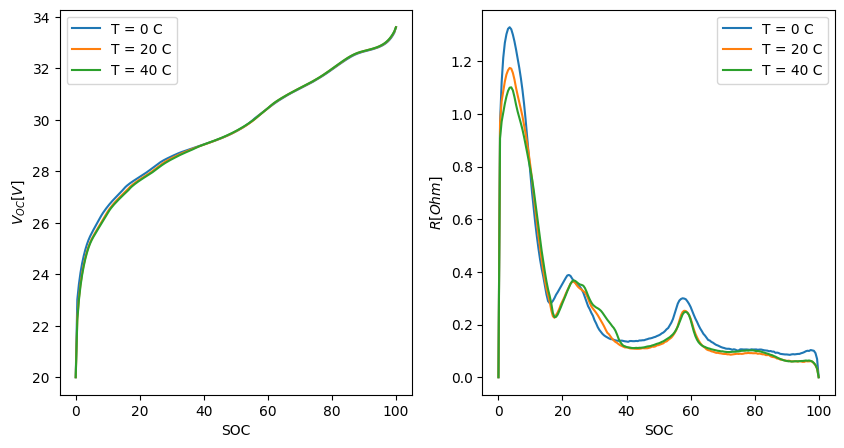

In [ ]:
da = np.genfromtxt ('../data/hardware/battery/battery_VOC.dat')
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(da[:,0],da[:,1], label='T = 0 C')
ax1.plot(da[:,0],da[:,3], label='T = 20 C')
ax1.plot(da[:,0],da[:,5], label='T = 40 C')
ax1.set_xlabel('SOC')
ax1.set_ylabel('$V_{OC} [V]$')
ax1.legend()


ax2.plot(da[:,0],da[:,2], label='T = 0 C')
ax2.plot(da[:,0],da[:,4], label='T = 20 C')
ax2.plot(da[:,0],da[:,6], label='T = 40 C')
ax2.set_xlabel('SOC')
ax2.set_ylabel('$R [Ohm]$')
ax2.legend()
